Machine Learning Exercises

# Imports

In [626]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)

# Utilities

In [627]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=variance, size=number)
    return noise

def create_points(number):
    x = np.linspace(start=0.0, stop=2.0, num=number)
    return x

def create_X(number, polynomial_degree, random=False):
    X = np.zeros((number, polynomial_degree + 1))
    for j in range(0, polynomial_degree + 1):
            X[:, j] = np.array(create_points(number))
            if random:
                temp = np.array(np.random.rand(number) * 2)
                X[:, j] = np.sort(temp)
            for i in range(0, number):
                X[i, j] = np.power(X[i, j], j)
    return X

def least_squares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def ridge_regression(X, y, lamda):
    theta = inv(X.T @ X + lamda * I) @ X.T @ y
    return theta

def mse(real, test):
    mse = np.square(real - test).mean()
    return mse

# Problem 1

## Problem 1 - Part 1

In [628]:
N = 20
variance = 0.1
theta_real = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])

In [629]:
noise = white_noise(N, variance)

In [630]:
X = create_X(N, 5)

In [631]:
y = X @ theta_real.T

In [632]:
y += noise

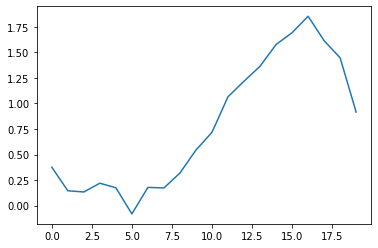

In [633]:
plt.plot(y)
plt.show()

In [634]:
theta_least_squares = least_squares(X, y)
theta_least_squares.round(3)

array([ 0.329, -0.77 , -0.489,  2.413, -0.762, -0.094])

In [635]:
real_set = create_X(1000, 5)
y_real = real_set @ theta_real.T
y_real += white_noise(1000, variance)

test_set = create_X(1000, 5, random=True)
y_test = test_set @ theta_least_squares.T

In [636]:
mse_test = mse(y_real, y_test)
mse_test.round(5)

0.11396

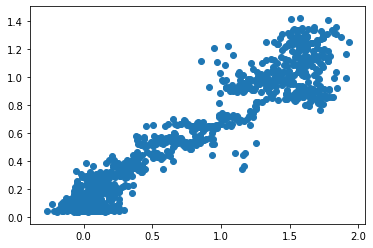

In [637]:
plt.scatter(y_real, y_test)
plt.show()

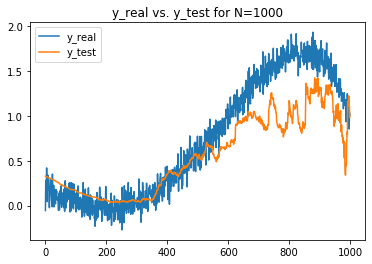

In [665]:
plt.plot(y_real, markersize=0.5, label='y_real')
plt.plot(y_test, markersize=0.5, label='y_test')
plt.title('y_real vs. y_test for N=1000')
plt.legend()
plt.show()

## Problem 1 - Part 2

In [639]:
X_2 = create_X(N, 2)
theta_least_squares_2 = least_squares(X_2, y)

X_10 = create_X(N, 10)
theta_least_squares_10 = least_squares(X_10, y)

In [640]:
theta_least_squares_2

array([-0.0496859 ,  0.72598447,  0.07713347])

In [641]:
theta_least_squares_10

array([   0.37492637,   -5.81452063,   48.08773105, -170.98946057,
        292.88348439, -237.88387608,   48.87099972,   64.56370483,
        -54.30636162,   16.807079  ,   -1.93438053])

In [642]:
points_exp_2 = np.zeros((100, 20))
points_exp_10 = np.zeros((100, 20))

for i in range(0, 100):
    np.random.seed(i)
    noise = white_noise(N, variance)
    y_2 = X_2 @ theta_least_squares_2.T
    y_2 += noise
    y_10 = X_10 @ theta_least_squares_10.T
    y_10 += noise
    points_exp_2[i] = y_2
    points_exp_10[i] = y_10

In [643]:
means_2 = np.mean(points_exp_2, axis=0)
variance_2 = np.std(points_exp_2, axis=0)
#variance_2 = np.var(points_exp_2, axis=0)
means_10 = np.mean(points_exp_10, axis=0)
variance_10 = np.std(points_exp_10, axis=0)
#variance_10 = np.var(points_exp_10, axis=0)

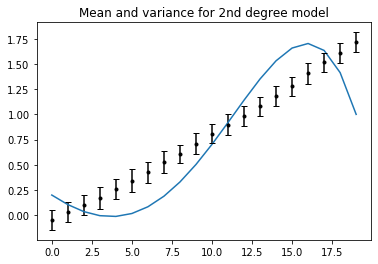

In [644]:
y_real_N = X @ theta_real.T

plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), means_2, yerr=variance_2, fmt='.k', capsize=3)
plt.title('Mean and variance for 2nd degree model')
plt.show()

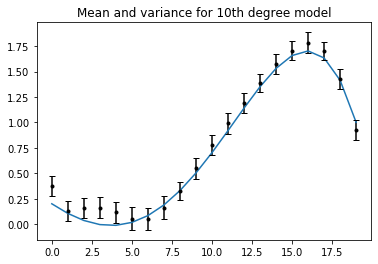

In [646]:
y_real_2 = X @ theta_real.T

plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), means_10, yerr=variance_10, fmt='.k', capsize=3)
plt.title('Mean and variance for 10th degree model')
plt.show()

## Problem 1 - Part 3

In [647]:
I = np.identity(6)
lamda_tests = np.array([0, 0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10])
lamda_mse = np.zeros(10)

In [648]:
for lamda in lamda_tests:
    theta_ridge = ridge_regression(X, y, lamda)
    y_ridge = test_set @ theta_ridge.T
    mse_ridge = mse(y_real, y_ridge)
    lamda_mse[np.where(lamda_tests == lamda)] = mse_ridge

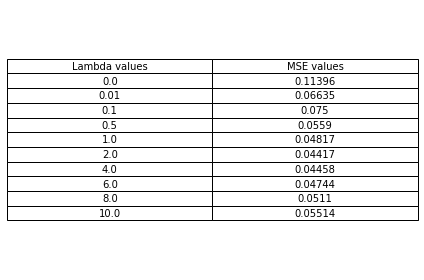

In [649]:
df = pd.DataFrame(np.column_stack((lamda_tests, lamda_mse.round(5))), 
                  columns=['Lambda values', 'MSE values'])

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.show()

In [650]:
lamda_mse

array([0.11395665, 0.0663537 , 0.0750002 , 0.05589521, 0.04817169,
       0.04416761, 0.04457626, 0.04744337, 0.05109867, 0.05514352])

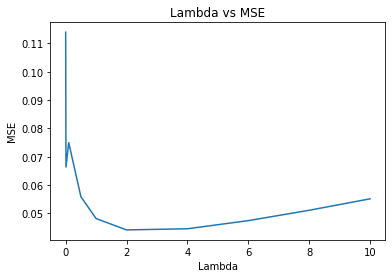

In [651]:
plt.plot(lamda_tests, lamda_mse)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Lambda vs MSE')
plt.show()

## Problem 1 - Part 4

In [652]:
def bayesian_inference(sigma_theta, sigma_heta, theta_prior, number):
    
    # Create matrix X2
    x2 = np.sort(np.random.rand(number) * 2)
    X2 = np.array([np.ones(number), x2, x2**2, x2**3, x2**5])
    
    # Create matrix PHI
    phi = np.linspace(start=0.0, stop=2.0, num=number)
    PHI = np.array([np.ones(number), phi, phi**2, phi**3, phi**5])
    
    # Set constants
    I = np.identity(5)
    noise = white_noise(number, sigma_heta)
    theta_real = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
    y_real_N = PHI.T @ theta_real
    y = y_real_N + noise
    
    # Perform Bayesian inference
    sigma_theta_posterior = inv((1 / sigma_theta) * I + (1 / sigma_heta) * PHI @ PHI.T)
    mu_theta_posterior = (theta_prior + (1 / sigma_heta) * sigma_theta_posterior @ PHI @ 
                          (y - PHI.T @ theta_prior))
    mu_y_predicted = X2.T @ mu_theta_posterior
    sigma_y_predicted = np.diag(sigma_heta + sigma_heta * sigma_theta * X2.T @
                            inv(sigma_heta * I + sigma_theta * (PHI @ PHI.T)) @ X2)
    
    # Visualize plot
    plt.plot(y_real_N, markersize=0.5)
    if number <= 100:
        plt.errorbar(range(0, number), mu_y_predicted, yerr=sigma_y_predicted, fmt='.k', capsize=3)
    else:
        plt.errorbar(range(0, number), mu_y_predicted, yerr=sigma_y_predicted, fmt=',k', capsize=0.1)
    plt.title('Bayesian Inference for N={}, sigma_theta = {}, sigma_heta = {}'.
             format(number, sigma_theta, sigma_heta))
    plt.show()

In [653]:
theta_prior = np.array([0.2, -1.0, 0.9, 0.7, -0.2])

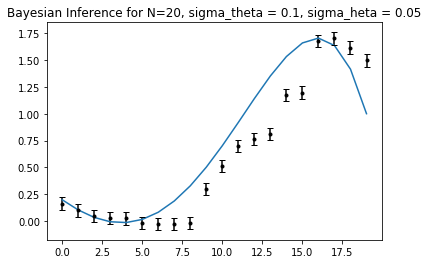

In [654]:
bayesian_inference(0.1, 0.05, theta_prior, 20)

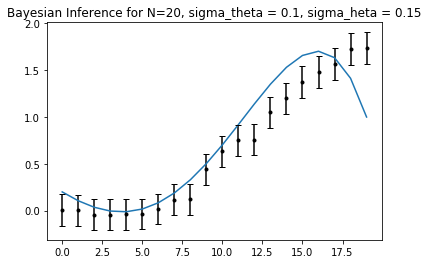

In [655]:
bayesian_inference(0.1, 0.15, theta_prior, 20)

## Problem 1 - Part 5

In [656]:
theta_prior_2 = np.array([-10.54, 0.465, 0.0087, -0.0093, -0.004])

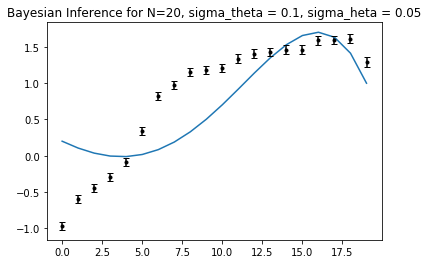

In [657]:
bayesian_inference(0.1, 0.05, theta_prior_2, 20)

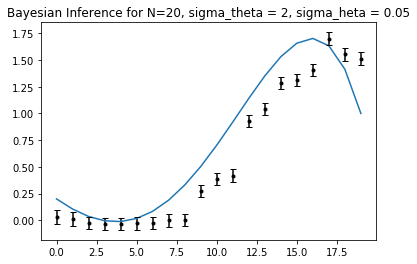

In [658]:
bayesian_inference(2, 0.05, theta_prior_2, 20)

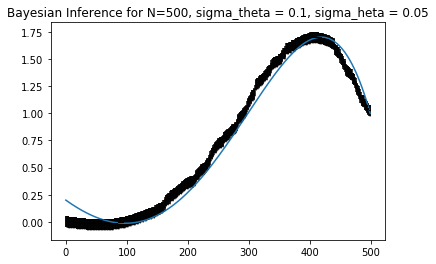

In [659]:
bayesian_inference(0.1, 0.05, theta_prior_2, 500)

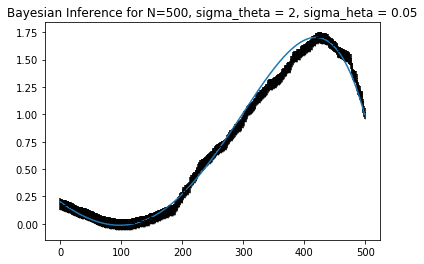

In [660]:
bayesian_inference(2, 0.05, theta_prior_2, 500)